In [ ]:
%pip install opencv-python numpy pandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 19.6 MB/s eta 0:00:00


In [ ]:
import os, cv2, numpy as np, pandas as pd, matplotlib

Note: using dataset from here: https://www.kaggle.com/datasets/tawsifurrahman/tuberculosis-tb-chest-xray-dataset

In [ ]:
!curl -L -o tbc.zip https://www.kaggle.com/api/v1/datasets/download/tawsifurrahman/tuberculosis-tb-chest-xray-dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  663M  100  663M    0     0   151M      0  0:00:04  0:00:04 --:--:--  168M


In [ ]:
!unzip -oq tbc.zip

In [ ]:
!gdown 1r-oNYTPiPCOUzSjChjCIYTdkjBTugqxR #tbx11k

Downloading...
From (original): https://drive.google.com/uc?id=1r-oNYTPiPCOUzSjChjCIYTdkjBTugqxR
From (redirected): https://drive.google.com/uc?id=1r-oNYTPiPCOUzSjChjCIYTdkjBTugqxR&confirm=t&uuid=85d5f715-a86e-4aeb-8021-d466a2baa920
To: /content/TBX11K.zip
100% 3.31G/3.31G [00:35<00:00, 92.3MB/s]


In [ ]:
!unzip TBX11K.zip

Streaming output truncated to the last 5000 lines.
  inflating: TBX11K/imgs/health/h2436.png  
  inflating: TBX11K/imgs/health/h2089.png  
  inflating: TBX11K/imgs/health/h1252.png  
  inflating: TBX11K/imgs/health/h3160.png  
  inflating: TBX11K/imgs/health/h0407.png  
  inflating: TBX11K/imgs/health/h4922.png  
  inflating: TBX11K/imgs/health/h4025.png  
  inflating: TBX11K/imgs/health/h3843.png  
  inflating: TBX11K/imgs/health/h4630.png  
  inflating: TBX11K/imgs/health/h0598.png  
  inflating: TBX11K/imgs/health/h0056.png  
  inflating: TBX11K/imgs/health/h3597.png  
  inflating: TBX11K/imgs/health/h2926.png  
  inflating: TBX11K/imgs/health/h0066.png  
  inflating: TBX11K/imgs/health/h2929.png  
  inflating: TBX11K/imgs/health/h1970.png  
  inflating: TBX11K/imgs/health/h3091.png  
  inflating: TBX11K/imgs/health/h3148.png  
  inflating: TBX11K/imgs/health/h1969.png  
  inflating: TBX11K/imgs/health/h1807.png  
  inflating: TBX11K/imgs/health/h1893.png  
  inflating: TBX11K/imgs/

In [ ]:
!git clone https://github.com/rifda83/pacd-kelp4

Cloning into 'pacd-kelp4'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 67 (delta 23), reused 53 (delta 16), pack-reused 0 (from 0)
Receiving objects: 100% (67/67), 4.28 MiB | 36.85 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [ ]:
!cd pacd-kelp4/ && git switch experimental

Branch 'experimental' set up to track remote branch 'experimental' from 'origin'.
Switched to a new branch 'experimental'


In [ ]:
!cp pacd-kelp4/* .

In [ ]:
!rm -rf pacd-kelp4/

In [ ]:
import os
import sys

module_path = os.path.abspath(".")

# if module_path not in sys.path:
sys.path.append(module_path)

from dataset import *
from segmentation import *

In [ ]:
x_normal, x_tb = get_dataset()
x_normal_test, x_tb_test = get_dataset_test()

In [ ]:
x_normal[0].shape

(132, 132)

In [ ]:
# x_tb

In [ ]:
x_tb[0].shape

(132, 132)

In [ ]:
from matplotlib import pyplot

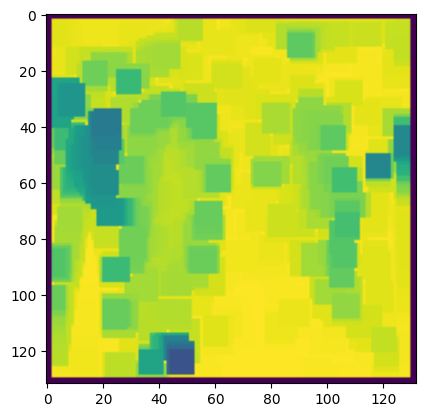

In [ ]:
pyplot.imshow(x_normal[0])

In [ ]:
# np.array(x_normal,dtype=np.float32)

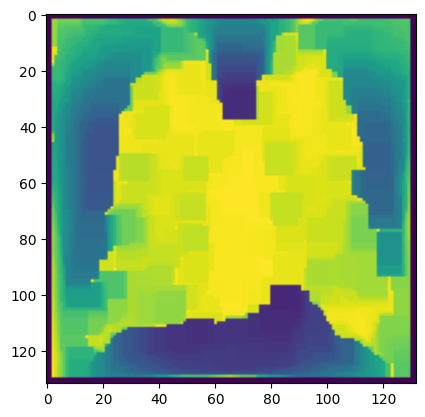

In [ ]:
pyplot.imshow(x_tb[0])

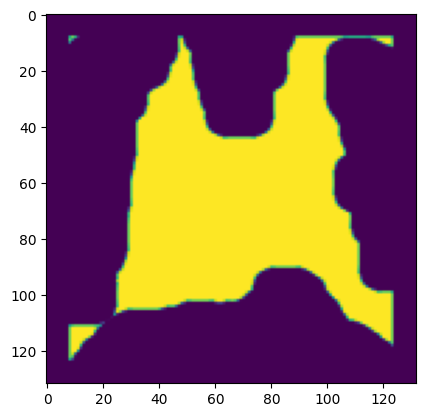

In [ ]:
pyplot.imshow(get_segmentation(x_tb[0]))

In [ ]:
np.array(x_tb).shape

(700, 132, 132)

In [ ]:
x=[get_segmentation(x) for x in x_normal[:len(x_tb)]]
y=["normal"]*len(x_normal[:len(x_tb)])
x=x+[get_segmentation(x) for x in x_tb]
y=y+["tb"]*len(x_tb)
dict = {
    "x": np.asarray(x),
    "y": np.asarray(y)
}

x_test=[get_segmentation(x_test) for x_test in x_normal_test]
y_test=["normal"]*len(x_normal_test)
x_test=x_test+[get_segmentation(x_test) for x_test in x_tb_test]
y_test=y_test+["tb"]*len(x_tb_test)
dict_test = {
    "x": np.asarray(x_test),
    "y": np.asarray(y_test)
}

In [ ]:
%pip install scikit-learn

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split
import sklearn.ensemble as en
from sklearn.preprocessing import LabelEncoder

from sklearn.svm import SVC

In [ ]:
dict["x"].shape

(1400, 132, 132)

In [ ]:
X_reshaped = dict["x"].reshape(dict["x"].shape[0], dict["x"].shape[1]*dict["x"].shape[2])
X_reshaped_test = dict_test["x"].reshape(dict_test["x"].shape[0], dict_test["x"].shape[1]*dict_test["x"].shape[2])

In [ ]:
# X_reshaped

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_reshaped, dict["y"] ,
                                   random_state=42,
                                   test_size=0.2,
                                   shuffle=True)

In [ ]:
le = LabelEncoder()
new_y_train = le.fit_transform(y_train)
new_y_val = le.transform(y_val)

In [ ]:
X_train.shape

(1120, 17424)

In [ ]:
y_train.shape

(1120,)

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler


In [ ]:
svc = SVC()

# Define parameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    scoring='accuracy',    # You can use 'f1', 'precision', or 'recall' for classification
    cv=5,                  # 5-fold cross-validation
    verbose=5,
    n_jobs=-1              # Use all CPU cores
)

In [ ]:
# clf = RandomForestClassifier(max_depth=2, random_state=42, verbose=True)

In [ ]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
X_val

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
# model.fit(X_train, new_y_train)
# random_search.fit(X_train, new_y_train)

In [ ]:
grid.fit(X_train, new_y_train)

print("Best parameters found:", grid.best_params_)
print("Best cross-validation score:", grid.best_score_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters found: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Best cross-validation score: 0.8571428571428571


In [ ]:
result = grid.predict(X_reshaped_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# trainres =model.predict(X_train)

In [ ]:
# accuracy_score(y_train, trainres)

In [ ]:
# accuracy_score(new_y_val, result)

In [ ]:
new_y_test = le.transform(dict_test['y'].astype(str))

In [ ]:
accuracy_score(new_y_test, result)

0.705

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(new_y_test, result))

              precision    recall  f1-score   support

           0       0.88      0.74      0.81      3800
           1       0.30      0.53      0.38       800

    accuracy                           0.70      4600
   macro avg       0.59      0.64      0.60      4600
weighted avg       0.78      0.70      0.73      4600



In [ ]:
from joblib import dump, load
dump(grid, "svc.joblib")

['svc.joblib']

In [ ]:
from joblib import dump, load
dump(le, "le.joblib")

['le.joblib']